# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Change the name of file with your roll no.



In [35]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 6: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

BayesA) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

BayesB) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

BayesC) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [37]:
# Cell type : CodeWrite

def function_for_A(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesA.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    s=Y_train.size
    s2 = X_train.size
    d=s2//s
    s3 = X_test.size//d

    pos = np.sum(Y_train == 1)
    neg = s - pos

    pos_arr = np.empty(shape=(0, 0))
    neg_arr = np.empty(shape=(0, 0))

    for i in range(s):
      if Y_train[i] == 1:
        pos_arr = np.append(pos_arr ,X_train[i])
      else :
        neg_arr = np.append(neg_arr,X_train[i])

    pos_arr = np.resize(pos_arr,(pos,d))
    neg_arr = np.resize(neg_arr,(neg,d))

    mu_pos = np.mean(pos_arr,axis=0)
    mu_neg = np.mean(neg_arr,axis=0)

    cov_pos = np.identity(d)
    cov_neg = np.identity(d)
    cov_inv_pos = np.linalg.inv(cov_pos)
    cov_inv_neg = np.linalg.inv(cov_neg)

    Y_result = np.zeros(s3)
    # print(s3)
    # print(mu_pos)
    # print(pos)
    # print(np.log(pos))
    for i in range(s3):
      x = X_test[i].reshape(1,d) - mu_pos.reshape(1,d)

      yy_pos = np.log(pos) - (np.log(np.linalg.det(cov_pos) ))/2 - np.matmul(x,np.matmul(cov_inv_pos,np.transpose(x)))/2
      #print(yy_pos)
      x = X_test[i].reshape(1,d) - mu_neg.reshape(1,d)
      yy_neg = np.log(neg) - (np.log(np.linalg.det(cov_neg) ))/2 - np.matmul(x,np.matmul(cov_inv_neg,np.transpose(x)))/2
      #print(yy_neg)
      if yy_pos > yy_neg :
        Y_result[i] = 1
      else :
        Y_result[i] = -1

    return (Y_result)

    
def function_for_B(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesB.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    s=Y_train.size
    s2 = X_train.size
    d=s2//s
    s3 = X_test.size//d

    pos = np.sum(Y_train == 1)
    neg = s - pos

    pos_arr = np.empty(shape=(0, 0))
    neg_arr = np.empty(shape=(0, 0))

    for i in range(s):
      if Y_train[i] == 1:
        pos_arr = np.append(pos_arr ,X_train[i])
      else :
        neg_arr = np.append(neg_arr,X_train[i])

    pos_arr = np.resize(pos_arr,(pos,d))
    neg_arr = np.resize(neg_arr,(neg,d))

    mu_pos = np.mean(pos_arr,axis=0)
    mu_neg = np.mean(neg_arr,axis=0)

    cov_pos = np.cov(X_train.T)
    cov_neg = np.cov(X_train.T)
    cov_inv_pos = np.linalg.inv(cov_pos)
    cov_inv_neg = np.linalg.inv(cov_neg)

    Y_result = np.zeros(s3)
    # print(s3)
    # print(mu_pos)
    # print(pos)
    # print(np.log(pos))
    for i in range(s3):
      x = X_test[i].reshape(1,d) - mu_pos.reshape(1,d)

      yy_pos = np.log(pos) - (np.log(np.linalg.det(cov_pos) ))/2 - np.matmul(x,np.matmul(cov_inv_pos,np.transpose(x)))/2
      #print(yy_pos)
      x = X_test[i].reshape(1,d) - mu_neg.reshape(1,d)
      yy_neg = np.log(neg) - (np.log(np.linalg.det(cov_neg) ))/2 - np.matmul(x,np.matmul(cov_inv_neg,np.transpose(x)))/2
      #print(yy_neg)
      if yy_pos > yy_neg :
        Y_result[i] = 1
      else :
        Y_result[i] = -1

    return (Y_result)




def function_for_C(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesC.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    s=Y_train.size
    s2 = X_train.size
    d=s2//s
    s3 = X_test.size//d

    pos = np.sum(Y_train == 1)
    neg = s - pos

    pos_arr = np.empty(shape=(0, 0))
    neg_arr = np.empty(shape=(0, 0))

    for i in range(s):
      if Y_train[i] == 1:
        pos_arr = np.append(pos_arr ,X_train[i])
      else :
        neg_arr = np.append(neg_arr,X_train[i])

    pos_arr = np.resize(pos_arr,(pos,d))
    neg_arr = np.resize(neg_arr,(neg,d))

    mu_pos = np.mean(pos_arr,axis=0)
    mu_neg = np.mean(neg_arr,axis=0)

    cov_pos = np.cov(pos_arr.T)
    cov_neg = np.cov(neg_arr.T)
    cov_inv_pos = np.linalg.inv(cov_pos)
    cov_inv_neg = np.linalg.inv(cov_neg)

    Y_result = np.zeros(s3)
    # print(s3)
    # print(mu_pos)
    # print(pos)
    # print(np.log(pos))
    for i in range(s3):
      x = X_test[i].reshape(1,d) - mu_pos.reshape(1,d)

      yy_pos = np.log(pos) - (np.log(np.linalg.det(cov_pos) ))/2 - np.matmul(x,np.matmul(cov_inv_pos,np.transpose(x)))/2
      #print(yy_pos)
      x = X_test[i].reshape(1,d) - mu_neg.reshape(1,d)
      yy_neg = np.log(neg) - (np.log(np.linalg.det(cov_neg) ))/2 - np.matmul(x,np.matmul(cov_inv_neg,np.transpose(x)))/2
      #print(yy_neg)
      if yy_pos > yy_neg :
        Y_result[i] = 1
      else :
        Y_result[i] = -1

    return (Y_result)
    
    




In [38]:
# Cell type : Convenience

# Testing the functions above

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 
# try to remove everything or comment out your lines before submitting.


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)
print(Y_pred_test_1c)

[ 1.  1.  1. ... -1. -1. -1.]


**Cell type : TextRead**

# Problem 6

#### 6a) Run the above three algorithms (BayesA,B and C), for the three datasets given (datasetA.npz, datasetB.npz, datasetC.npz) in the cell below.
#### In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.





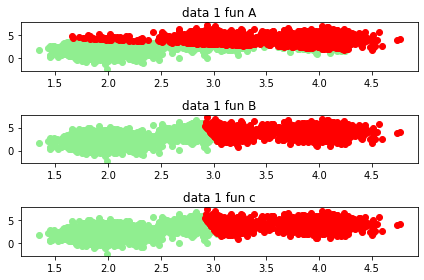

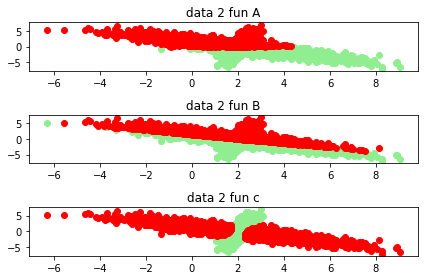

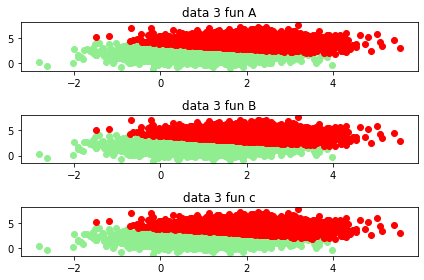

In [44]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def split (X_train,Y_train):
  s=Y_train.size
  s2 = X_train.size
  d=s2//s
  pos = np.sum(Y_train == 1)
  neg = s - pos

  pos_arr = np.empty(shape=(0, 0))
  neg_arr = np.empty(shape=(0, 0))
  for i in range(s):
    if Y_train[i] == 1:
      pos_arr = np.append(pos_arr ,X_train[i])
    else :
      neg_arr = np.append(neg_arr,X_train[i])
  return pos_arr.reshape(pos,d) , neg_arr.reshape(neg,d) 

def fun(s,i):
  data = np.load(s)
  X_train = data["arr_0"]
  Y_train = data["arr_1"]
  X_test = data["arr_2"]


  X_test = np.concatenate((X_test,X_train),axis=0)

  Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
  Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
  Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)

  pos_a,neg_a = split (X_test,Y_pred_test_1a)
  pos_b,neg_b = split (X_test,Y_pred_test_1b)
  pos_c,neg_c = split (X_test,Y_pred_test_1c)

  pos_a.shape
  y=plt.figure(i)
  

  plt.subplot(311)
  plt.title("data "+str(i)+' fun A')
  plt.scatter(pos_a[:,0],pos_a[:,1],c='lightgreen')
  plt.scatter(neg_a[:,0],neg_a[:,1],c='red')

  plt.subplot(312)
  plt.title("data "+str(i)+' fun B')
  plt.scatter(pos_b[:,0],pos_b[:,1],c='lightgreen')
  plt.scatter(neg_b[:,0],neg_b[:,1],c='red')

  plt.subplot(313)
  plt.title("data "+str(i)+' fun c')
  plt.scatter(pos_c[:,0],pos_c[:,1],c='lightgreen')
  plt.scatter(neg_c[:,0],neg_c[:,1],c='red')

  y.tight_layout()

fun('/content/datasetA.npz',1)
fun('/content/datasetB.npz',2)
fun('/content/datasetC.npz',3)


####6b) Give the ROC Curves for all the classifiers.



In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)



####6c) In the next Textwrite cell, give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.



**Cell type : TextWrite**
(Write your observations and table of errors here)


####6d) In the next Textwrite cell, summarise your observations regarding the nine learnt classifiers.